###Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt

###Reading dataset from github

In [ ]:
l_class1 = pd.read_csv("https://raw.githubusercontent.com/ayush0x00/PRCS669/master/assign1_data/q2/l_class1.txt",sep=" ",header=None)
l_class2 = pd.read_csv("https://raw.githubusercontent.com/ayush0x00/PRCS669/master/assign1_data/q2/l_class2.txt",sep=" ",header=None)
l_class3 = pd.read_csv("https://raw.githubusercontent.com/ayush0x00/PRCS669/master/assign1_data/q2/l_class3.txt",sep=" ",header=None)
nl_class1 = pd.read_csv("https://raw.githubusercontent.com/ayush0x00/PRCS669/master/assign1_data/q2/nl_class1.txt",sep=" ",header=None).drop(columns=2)
nl_class2 = pd.read_csv("https://raw.githubusercontent.com/ayush0x00/PRCS669/master/assign1_data/q2/nl_class2.txt",sep=" ",header=None).drop(columns=2)
nl_class3 = pd.read_csv("https://raw.githubusercontent.com/ayush0x00/PRCS669/master/assign1_data/q2/nl_class3.txt",sep=" ",header=None).drop(columns=2)

linearClassData = [l_class1,l_class2,l_class3]
nonlinearClassData = [nl_class1,nl_class2,nl_class3]

###Plotting the given dataset

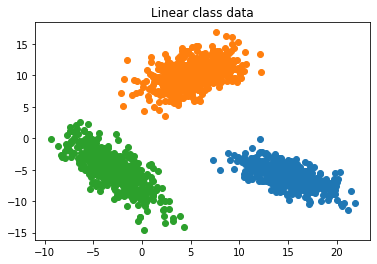

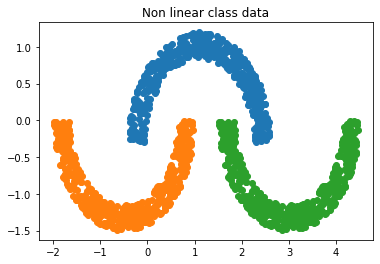

In [ ]:
plt.title("Linear class data")
plt.scatter(l_class1.iloc[:,0].values.tolist(),l_class1.iloc[:,1].values.tolist())
plt.scatter(l_class2.iloc[:,0].values.tolist(),l_class2.iloc[:,1].values.tolist())
plt.scatter(l_class3.iloc[:,0].values.tolist(),l_class3.iloc[:,1].values.tolist())
plt.show()

plt.title("Non linear class data")
plt.scatter(nl_class1.iloc[:,0].values.tolist(),nl_class1.iloc[:,1].values.tolist())
plt.scatter(nl_class2.iloc[:,0].values.tolist(),nl_class2.iloc[:,1].values.tolist())
plt.scatter(nl_class3.iloc[:,0].values.tolist(),nl_class3.iloc[:,1].values.tolist())
plt.show()

###Defining function to get covariance matrix and mean for given class

In [ ]:
def getClassInfo(classData):
  feature1= classData.iloc[:,0]
  feature2= classData.iloc[:,1]
  mean = np.stack(([np.mean(feature1)],[np.mean(feature2)]))
  covMatrix = np.cov(np.stack((feature1,feature2)))
  return {"mean":mean,"covMatrix":covMatrix}

###Multivariate normal distribution

In [ ]:
def getProbDensity(featureVector,mean,covMatrix,priorProb):
  covInv = np.linalg.inv(covMatrix)
  firstTerm = -0.5 * np.dot(np.matmul(np.transpose(featureVector - mean),covInv) , (featureVector - mean))
  secondTerm = -0.5 * np.log(np.linalg.det(covMatrix))
  thirdTerm = np.log(priorProb)
  probab = firstTerm + secondTerm + thirdTerm
  return probab

###Defining 4 classifiers as mentioned in the question

In [ ]:
def classifier1(featureVector, numOfClasses, prior_prob,classInfo):
  classProbab = []
  variance = []
  for i in range(numOfClasses):
    covMatrix = classInfo[i]["covMatrix"]
    feature1_variance = covMatrix[0][0]
    feature2_variance = covMatrix[1][1]
    variance.append(feature1_variance)
    variance.append(feature2_variance)
  mean_variance = np.mean(variance)
  for i in range(numOfClasses):
    probab = getProbDensity(featureVector,classInfo[i]["mean"],[[mean_variance,0],[0,mean_variance]], prior_prob[i])
    classProbab.append(probab)
  return np.argmax(classProbab)

def classifier2(featureVector, numOfClasses, prior_prob,classInfo):
  classProbab = []
  avgCovMatrix= np.zeros((2,2))
  for i in range(numOfClasses):
    avgCovMatrix += classInfo[i]["covMatrix"]
  avgCovMatrix /= 3*np.ones((2,2))

  for i in range(numOfClasses):
    probab = getProbDensity(featureVector,classInfo[i]["mean"],avgCovMatrix, prior_prob[i])
    classProbab.append(probab)
  return np.argmax(classProbab)

def classifier3(featureVector, numOfClasses,prior_prob,classInfo):
  classProbab=[]
  for i in range(numOfClasses):
    covMatrix = classInfo[i]["covMatrix"]
    covMatrix[0][1]=0
    covMatrix[1][0]=0

    probab = getProbDensity(featureVector,classInfo[i]["mean"],covMatrix, prior_prob[i])
    classProbab.append(probab)
  return np.argmax(classProbab)

def classifier4(featureVector, numOfClasses, prior_prob,classInfo):
  classProbab = []
  for i in range(numOfClasses):
    covMatrix = classInfo[i]["covMatrix"]
    probab = getProbDensity(featureVector,classInfo[i]["mean"],covMatrix, prior_prob[i])
    classProbab.append(probab)
  return np.argmax(classProbab)


###Defining function to return [accuracy,precision,recall,f_score] on the basis of estimated class and actual class 

In [ ]:
def getMetrics(estimated, actual, numOfClasses):
  confusionMatrix = np.array([[0 for i in range(numOfClasses)] for j in range(numOfClasses)])

  for i in range(len(estimated)):
    confusionMatrix[actual[i]][estimated[i]]+=1
  
  correct_pred = confusionMatrix[0][0] + confusionMatrix[1][1] + confusionMatrix[2][2]
  total_pred = np.sum(confusionMatrix)
  accuracy =  correct_pred/total_pred
  
  prec_1 = confusionMatrix[0][0]/(confusionMatrix[0][0] + confusionMatrix[0][1] + confusionMatrix[0][2])
  prec_2 = confusionMatrix[1][1]/(confusionMatrix[1][0] + confusionMatrix[1][1] + confusionMatrix[1][2])
  prec_3 = confusionMatrix[2][2]/(confusionMatrix[2][2] + confusionMatrix[2][1] + confusionMatrix[2][0])
  precision =  (prec_1 + prec_2 + prec_3) / 3
  
  r_1 = confusionMatrix[0][0] / (confusionMatrix[0][0]+ confusionMatrix[1][0] + confusionMatrix[2][0])
  r_2 = confusionMatrix[1][1] / (confusionMatrix[1][1]+ confusionMatrix[0][1] + confusionMatrix[2][1])
  r_3 = confusionMatrix[2][2] / (confusionMatrix[2][2]+ confusionMatrix[0][2] + confusionMatrix[1][2])
  recall =  (r_1 + r_2 + r_3) / 3
  f_score =  2/(1 / precision + 1/ recall)

  return {"accuracy":accuracy,"precision":precision,"recall":recall,"f_score":f_score}

###Defining function to randomly generate training and testing dataset

In [ ]:
def getTrainTestData(classInfo):
  testData=[]
  trainData=[]
  for i in range(len(classInfo)):
    t=random.randrange(1000)
    if t%2==0:
      testData.append(classInfo.iloc[i].values.tolist())
    else:
      trainData.append(classInfo.iloc[i].values.tolist())
  return [trainData, testData]

###Function to build a model based on class data. Returns the weights and metrics for the model

In [ ]:
def trainClassifier(classData,numOfClasses):
  tt1=getTrainTestData(classData[0])
  tt2=getTrainTestData(classData[1])
  tt3=getTrainTestData(classData[2])

  l_class1_test_data = pd.DataFrame(tt1[1])
  l_class2_test_data = pd.DataFrame(tt2[1])
  l_class3_test_data = pd.DataFrame(tt3[1])
  l_class1_train_data = pd.DataFrame(tt1[0])
  l_class2_train_data = pd.DataFrame(tt2[0])
  l_class3_train_data = pd.DataFrame(tt3[0])

  testClassData=[l_class1_test_data,l_class2_test_data,l_class3_test_data]
  trainClassData=[l_class1_train_data,l_class2_train_data,l_class3_train_data]


  numOfClasses = 3
  prior_prob=[1/3,1/3,1/3]
  classInfo=[]

  test_features=[]
  test_groundTruth=[]

  while(len(test_groundTruth) <= 400):
    actualClass = random.randint(0,2)
    test_groundTruth.append(actualClass)
    classFeature = testClassData[actualClass]
    randomFeature = classFeature.iloc[random.randint(0,200)]
    test_features.append(randomFeature.values.tolist())

  for i in range(numOfClasses):
      classInfo.append(getClassInfo(classData[i]))

  classifiers = [classifier1, classifier2,classifier3,classifier4]

  metrics=[]
  for classifier in classifiers:
    estimatedClass = []
    for features in test_features:
      est= classifier(np.array(features).reshape((2,1)),numOfClasses,prior_prob,classInfo)
      estimatedClass.append(est)
    classifierMetric = getMetrics(estimatedClass,test_groundTruth,3)
    metrics.append(classifierMetric)

  return [classInfo , metrics]

###Plotting the contours on the basis of returned weights from the training

In [ ]:
def plotContours(classInfo,priorProbab,numOfClasses,gridLength,isLinearData):
  x = np.linspace(gridLength[0],gridLength[1],101)
  y = np.linspace(gridLength[2],gridLength[3],101)
  xx, yy = np.meshgrid(x, y)
  featureVector = np.c_[xx.ravel(), yy.ravel()]
  classifiers = [classifier1, classifier2,classifier3,classifier4]
  estimation = []
  for classifier in classifiers:
    estimation = []
    for feature in featureVector:
      est = classifier(np.array(feature).reshape((2,1)),3,priorProbab,classInfo)
      estimation.append(est)
    estimation = np.array(estimation).reshape(xx.shape)
    plt.contourf(xx,yy,estimation,alpha=0.3)

    if isLinearData:
      plt.title("Decision boundary for linear seperable classes by {0}".format(classifier.__name__))
      plt.scatter(l_class1.iloc[:,0].values.tolist(),l_class1.iloc[:,1].values.tolist(),label="class1",marker="o")
      plt.scatter(l_class2.iloc[:,0].values.tolist(),l_class2.iloc[:,1].values.tolist(),label="class2",marker="*")
      plt.scatter(l_class3.iloc[:,0].values.tolist(),l_class3.iloc[:,1].values.tolist(),label="class3",marker="^")
      plt.legend()
      
    else:  
      plt.title("Decision boundary for non-linear seperable classes by {0}".format(classifier.__name__))
      plt.scatter(nl_class1.iloc[:,0].values.tolist(),nl_class1.iloc[:,1].values.tolist(),label="class1",marker="o")
      plt.scatter(nl_class2.iloc[:,0].values.tolist(),nl_class2.iloc[:,1].values.tolist(),label="class2",marker="*")
      plt.scatter(nl_class3.iloc[:,0].values.tolist(),nl_class3.iloc[:,1].values.tolist(),label="class3",marker="^")
      plt.legend()
    plt.show()

###Function to print the metrics of the given format

In [ ]:
def printMetrics(metric):
  print('Classifier', 'Acc.', 'Prec.', 'Recall', 'F-score', sep = '\t|')
  for i in range(len(metric)):
    print(f'C{i+1}\t', f'{metric[i]["accuracy"]: .3f}', f'{metric[i]["precision"]: .3f}', f'{metric[i]["recall"]: .3f}', f'{metric[i]["f_score"]: .3f}', sep = '\t|')

###Training the model and plotting the contour. The metrics are also printed as required for linear class data

Classifier	|Acc.	|Prec.	|Recall	|F-score
C1		| 1.000	| 1.000	| 1.000	| 1.000
C2		| 1.000	| 1.000	| 1.000	| 1.000
C3		| 1.000	| 1.000	| 1.000	| 1.000
C4		| 1.000	| 1.000	| 1.000	| 1.000


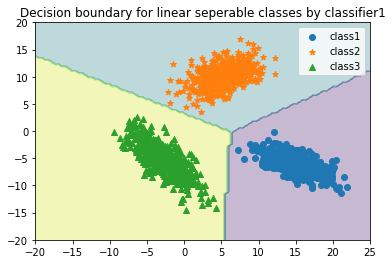

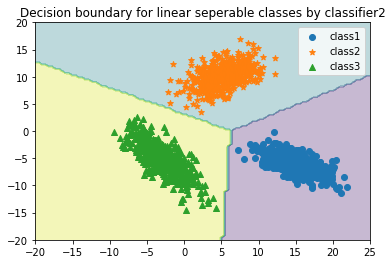

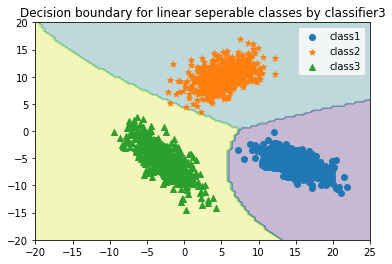

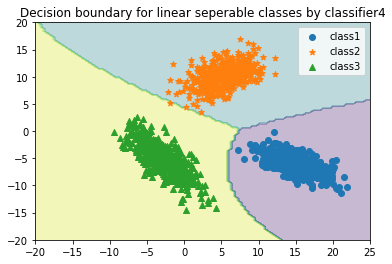

In [ ]:
model = trainClassifier(linearClassData,3)
classInfo = model[0]
classMetric = model[1]
priorProbab = [1/3,1/3,1/3]
gridLength = [-20,25,-20,20]
printMetrics(classMetric)
plotContours(classInfo,priorProbab,3,gridLength,True)

###Training the model for non linear seperable classes. The contours and the metrics are also printed as required.

Classifier	|Acc.	|Prec.	|Recall	|F-score
C1		| 0.776	| 0.770	| 0.769	| 0.769
C2		| 0.885	| 0.882	| 0.884	| 0.883
C3		| 0.880	| 0.876	| 0.879	| 0.877
C4		| 0.880	| 0.876	| 0.879	| 0.877


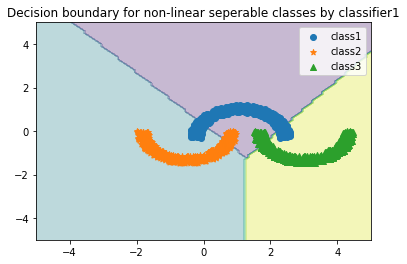

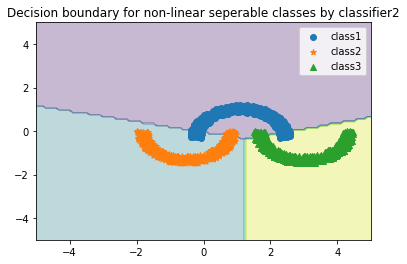

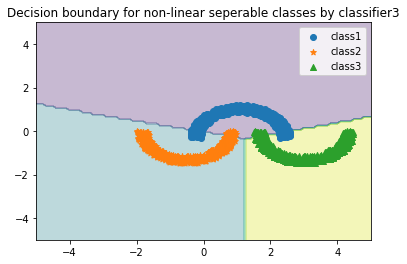

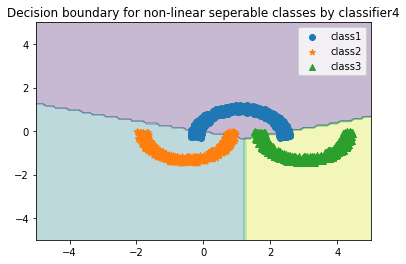

In [ ]:
model = trainClassifier(nonlinearClassData,3)
classInfoNonLinear = model[0]
classMetric = model[1]
priorProbab = [1/3,1/3,1/3]
gridLength = [-5,5,-5,5]
printMetrics(classMetric)
plotContours(classInfoNonLinear,priorProbab,3,gridLength,False)

#Inference

---

From the contour plots and the classifier metrics, it is evident that the classifiers performs better when the datasets are linearly seperable. They have 100% accuracy and can clearly distinguish between all the classes in case of linearly seperable. However, their accuracy reduces by 10-12% when datasets are not linearly seperable. In such case, the performance of classifier 1 is the worst, as it can be seen from the metrics of accuracy,precision,recall and f_score.